# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 05.11.2020

Мягкий дедлайн: 01:59MSK 18.11.2019

Жесткий дедлайн: 01:59MSK 22.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/21899 нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

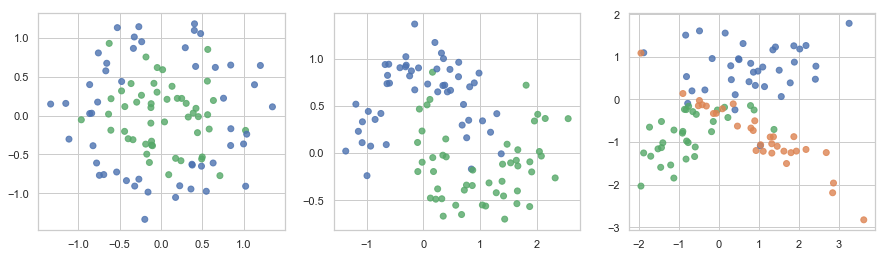

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

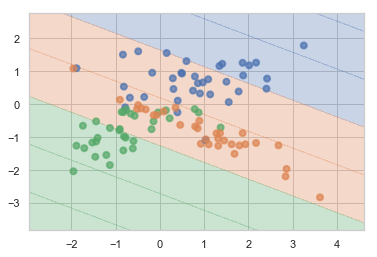

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
from sklearn.model_selection import train_test_split

X, y = datasets[0]
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(
    X, y, test_size=0.3, random_state=42)

X, y = datasets[1]
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X, y, test_size=0.3, random_state=42)

X, y = datasets[2]
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X, y, test_size=0.3, random_state=42)

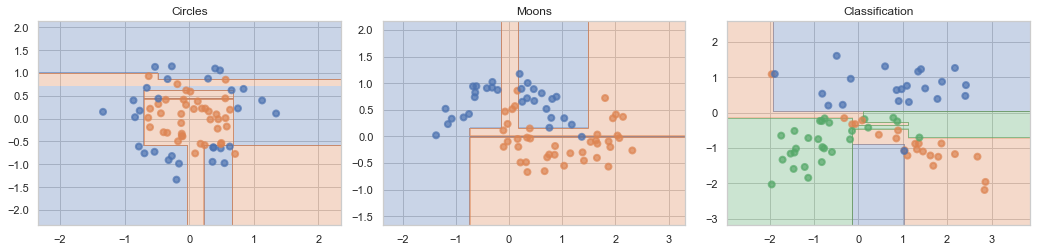

Accuracy on circles_train: 1.0
Accuracy on circles_test: 0.7333333333333333

Accuracy on moons_train: 1.0
Accuracy on moons_test: 0.8666666666666667

Accuracy on classification_train: 1.0
Accuracy on classification_test: 0.8


In [8]:
from sklearn import tree

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.title('Circles')
clf_circle = tree.DecisionTreeClassifier()
res = clf_circle.fit(X_train_circles, y_train_circles)
plot_surface(res, X_train_circles, y_train_circles)

plt.subplot(1, 3, 2)
plt.title('Moons')
clf_moons = tree.DecisionTreeClassifier()
res = clf_moons.fit(X_train_moons, y_train_moons)
plot_surface(res, X_train_moons, y_train_moons)

plt.subplot(1, 3, 3)
plt.title('Classification')
clf_classification = tree.DecisionTreeClassifier()
res = clf_classification.fit(X_train_classification, y_train_classification)
plot_surface(res, X_train_classification, y_train_classification)

plt.show()
print(f'Accuracy on circles_train: {clf_circle.score(X_train_circles, y_train_circles)}')
print(f'Accuracy on circles_test: {clf_circle.score(X_test_circles, y_test_circles)}\n')
print(f'Accuracy on moons_train: {clf_moons.score(X_train_moons, y_train_moons)}')
print(f'Accuracy on moons_test: {clf_moons.score(X_test_moons, y_test_moons)}\n')
print(f'Accuracy on classification_train: {clf_classification.score(X_train_classification, y_train_classification)}')
print(f'Accuracy on classification_test: {clf_classification.score(X_test_classification, y_test_classification)}')

__Ответ:__ Деревья переобучились относитнльно несильно, судя по accuracy, но на рисунке заметно сильное переобучение

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

***Dividing planes with max_depth: 1 and min_samples_leaf: 5***


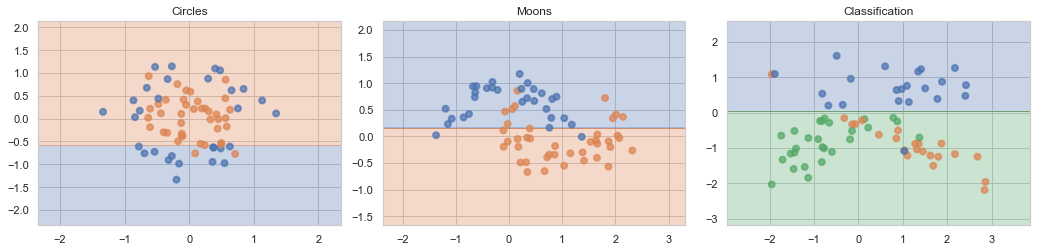

Accuracy on circles_train: 0.7285714285714285
Accuracy on circles_test: 0.4666666666666667

Accuracy on moons_train: 0.8428571428571429
Accuracy on moons_test: 0.8

Accuracy on classification_train: 0.6714285714285714
Accuracy on classification_test: 0.6
***Dividing planes with max_depth: 1 and min_samples_leaf: 10***


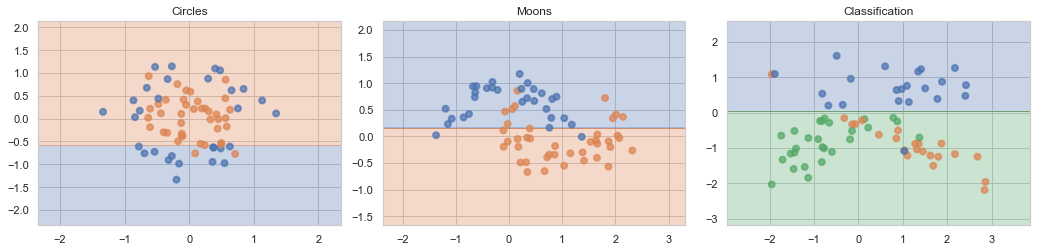

Accuracy on circles_train: 0.7285714285714285
Accuracy on circles_test: 0.4666666666666667

Accuracy on moons_train: 0.8428571428571429
Accuracy on moons_test: 0.8

Accuracy on classification_train: 0.6714285714285714
Accuracy on classification_test: 0.6
***Dividing planes with max_depth: 1 and min_samples_leaf: 15***


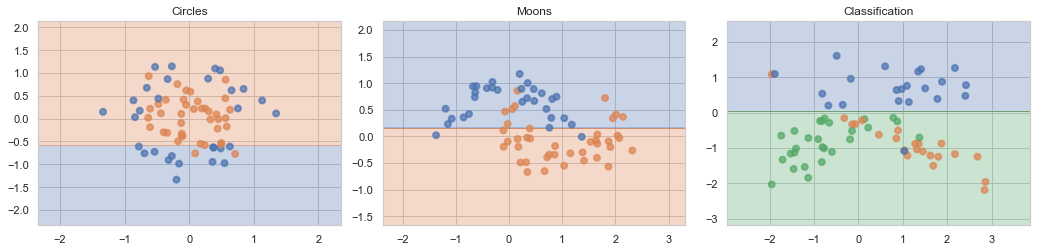

Accuracy on circles_train: 0.7285714285714285
Accuracy on circles_test: 0.4666666666666667

Accuracy on moons_train: 0.8428571428571429
Accuracy on moons_test: 0.8

Accuracy on classification_train: 0.6714285714285714
Accuracy on classification_test: 0.6
***Dividing planes with max_depth: 4 and min_samples_leaf: 5***


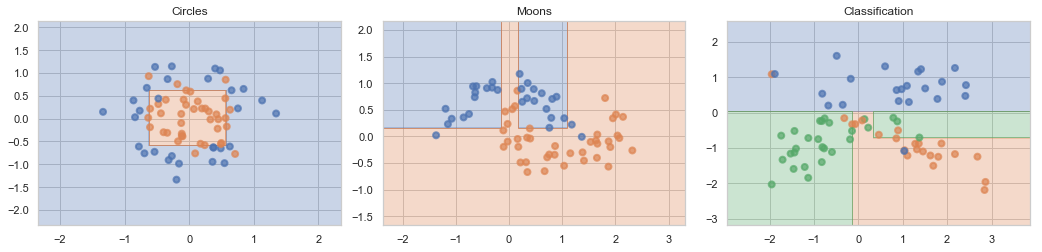

Accuracy on circles_train: 0.8714285714285714
Accuracy on circles_test: 0.9

Accuracy on moons_train: 0.9571428571428572
Accuracy on moons_test: 0.7333333333333333

Accuracy on classification_train: 0.9
Accuracy on classification_test: 0.7
***Dividing planes with max_depth: 4 and min_samples_leaf: 10***


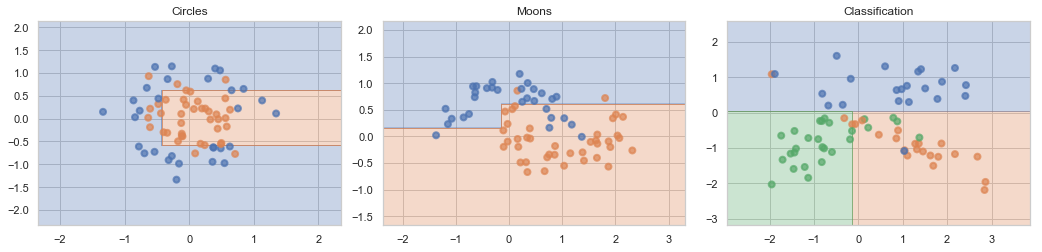

Accuracy on circles_train: 0.8142857142857143
Accuracy on circles_test: 0.7666666666666667

Accuracy on moons_train: 0.8714285714285714
Accuracy on moons_test: 0.7666666666666667

Accuracy on classification_train: 0.8857142857142857
Accuracy on classification_test: 0.7666666666666667
***Dividing planes with max_depth: 4 and min_samples_leaf: 15***


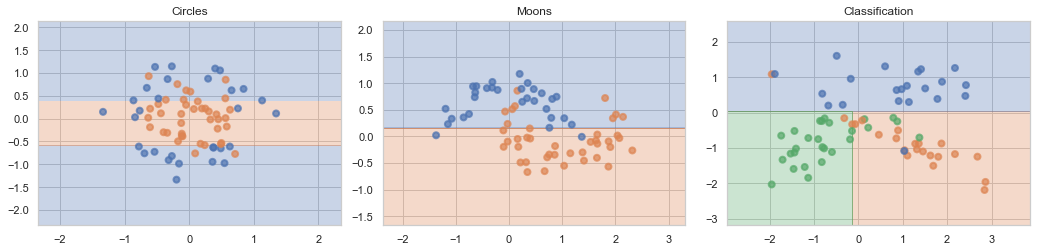

Accuracy on circles_train: 0.7857142857142857
Accuracy on circles_test: 0.7

Accuracy on moons_train: 0.8428571428571429
Accuracy on moons_test: 0.8

Accuracy on classification_train: 0.8857142857142857
Accuracy on classification_test: 0.7666666666666667
***Dividing planes with max_depth: 7 and min_samples_leaf: 5***


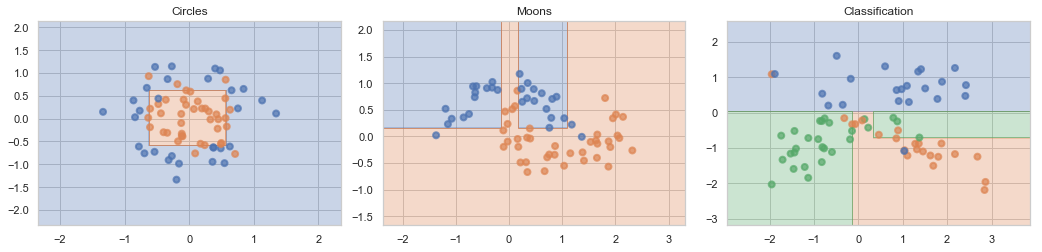

Accuracy on circles_train: 0.8714285714285714
Accuracy on circles_test: 0.9

Accuracy on moons_train: 0.9571428571428572
Accuracy on moons_test: 0.7333333333333333

Accuracy on classification_train: 0.9
Accuracy on classification_test: 0.7
***Dividing planes with max_depth: 7 and min_samples_leaf: 10***


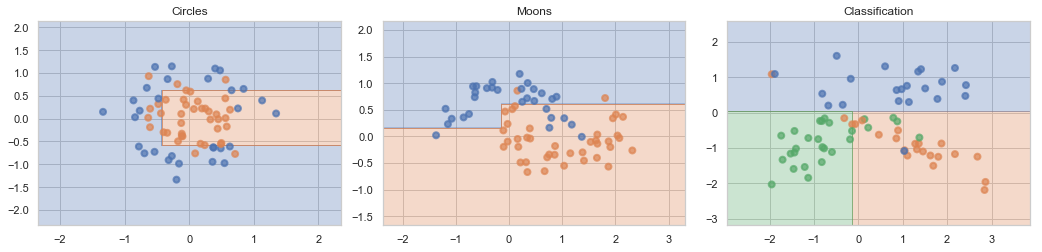

Accuracy on circles_train: 0.8142857142857143
Accuracy on circles_test: 0.7666666666666667

Accuracy on moons_train: 0.8714285714285714
Accuracy on moons_test: 0.7666666666666667

Accuracy on classification_train: 0.8857142857142857
Accuracy on classification_test: 0.7666666666666667
***Dividing planes with max_depth: 7 and min_samples_leaf: 15***


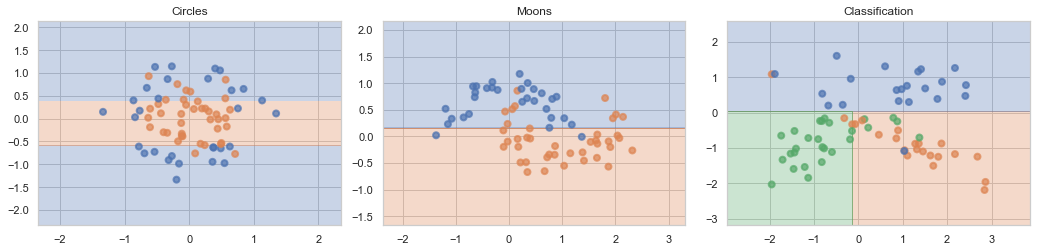

Accuracy on circles_train: 0.7857142857142857
Accuracy on circles_test: 0.7

Accuracy on moons_train: 0.8428571428571429
Accuracy on moons_test: 0.8

Accuracy on classification_train: 0.8857142857142857
Accuracy on classification_test: 0.7666666666666667
***Dividing planes with max_depth: 10 and min_samples_leaf: 5***


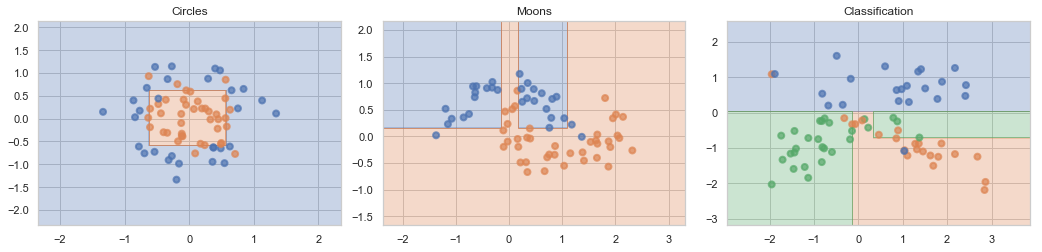

Accuracy on circles_train: 0.8714285714285714
Accuracy on circles_test: 0.9

Accuracy on moons_train: 0.9571428571428572
Accuracy on moons_test: 0.7333333333333333

Accuracy on classification_train: 0.9
Accuracy on classification_test: 0.7
***Dividing planes with max_depth: 10 and min_samples_leaf: 10***


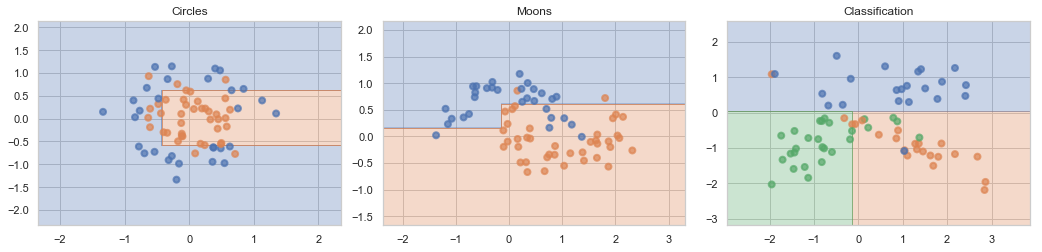

Accuracy on circles_train: 0.8142857142857143
Accuracy on circles_test: 0.7666666666666667

Accuracy on moons_train: 0.8714285714285714
Accuracy on moons_test: 0.7666666666666667

Accuracy on classification_train: 0.8857142857142857
Accuracy on classification_test: 0.7666666666666667
***Dividing planes with max_depth: 10 and min_samples_leaf: 15***


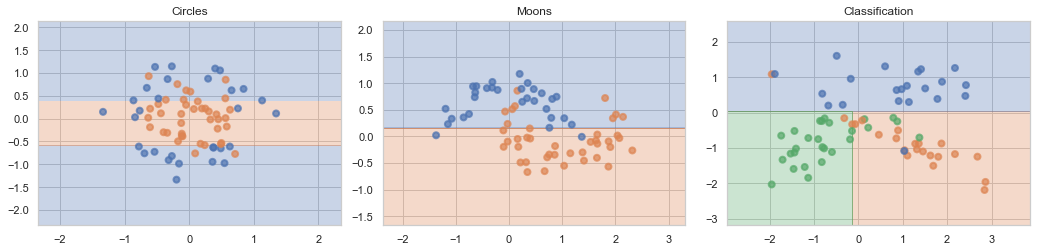

Accuracy on circles_train: 0.7857142857142857
Accuracy on circles_test: 0.7

Accuracy on moons_train: 0.8428571428571429
Accuracy on moons_test: 0.8

Accuracy on classification_train: 0.8857142857142857
Accuracy on classification_test: 0.7666666666666667


In [9]:
from sklearn import tree
from sklearn.metrics import accuracy_score


for depth in [1, 4, 7, 10]:
    for samples_leaf in [5, 10, 15]:
        plt.figure(figsize=(15, 4))
        plt.subplot(1, 3, 1)
        plt.title('Circles')
        clf_circle = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples_leaf)
        res = clf_circle.fit(X_train_circles, y_train_circles)
        plot_surface(res, X_train_circles, y_train_circles)

        plt.subplot(1, 3, 2)
        plt.title('Moons')
        clf_moons = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples_leaf)
        res = clf_moons.fit(X_train_moons, y_train_moons)
        plot_surface(res, X_train_moons, y_train_moons)

        plt.subplot(1, 3, 3)
        plt.title('Classification')
        clf_classification = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples_leaf)
        res = clf_classification.fit(X_train_classification, y_train_classification)
        plot_surface(res, X_train_classification, y_train_classification)
        print(f'***Dividing planes with max_depth: {depth} and min_samples_leaf: {samples_leaf}***')
        plt.show()
        
        print(f'Accuracy on circles_train: {clf_circle.score(X_train_circles, y_train_circles)}')
        print(f'Accuracy on circles_test: {clf_circle.score(X_test_circles, y_test_circles)}\n')
        print(f'Accuracy on moons_train: {clf_moons.score(X_train_moons, y_train_moons)}')
        print(f'Accuracy on moons_test: {clf_moons.score(X_test_moons, y_test_moons)}\n')
        print(f'Accuracy on classification_train: {clf_classification.score(X_train_classification, y_train_classification)}')
        print(f'Accuracy on classification_test: {clf_classification.score(X_test_classification, y_test_classification)}')

__Ответ:__ Для датасета circles accuracy увеличивается при увелечнии max_depth до 4, а затем остается постоянной, так как для оптимальной классификаии нам достаточно выделить прямоугольник посередине, увелечение же min_samples_leaf ведет к переобучению, засчет того, что дереву приходится растягивать прямоугольник, чтобы туда попало как можно больше элементов.

Для датасета moons max_depth практически не меняет разделяющие плоскости, так как у нас мало сильно выделяющихся выбросов, и нам не нужно много прямых, чтобы делить плоскость, а вот увеличение min_samples_leaf ведет к улучшение accuracy на тестовой выборке и ухудшение на тренировочной, что логично, потому что оптимальным вариантом для нас здесь будет являться разделение плоскости пополам одной линией

Для датасета Classification меняет картину только max_depth, лучшее значение accuracy на тестовой выборке у нас тогда, когда максимальной глубины достаточно, чтобы разбить плоскость на три примерно одинаковых куска, что логично, так как зеленые объекты в болшинстве своем находятся в левом нижнем углу, оранжевые в правом нижнем и синее в верхней половине

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [10]:
%load_ext autoreload

In [11]:
%autoreload 2
from hw5code import find_best_split

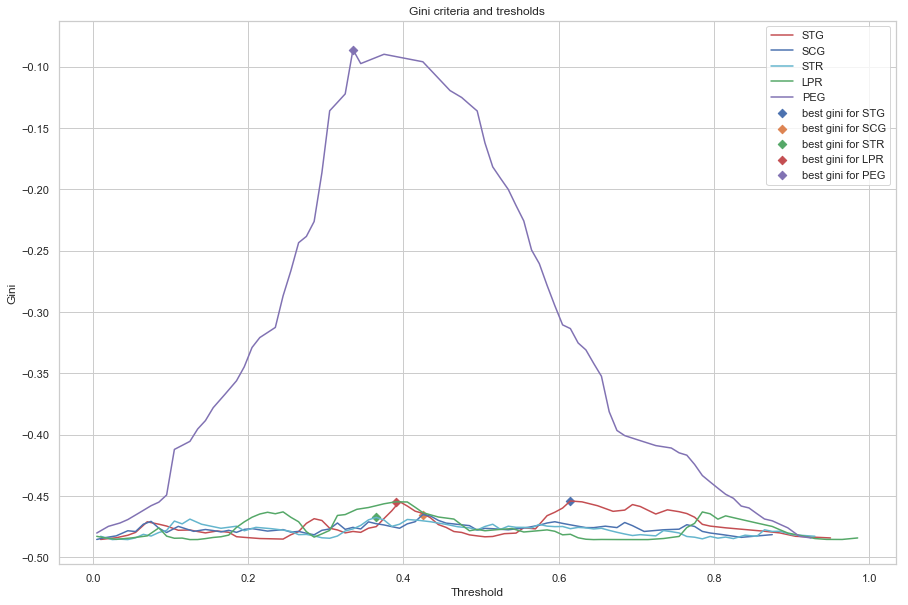

In [12]:
data = pd.read_csv('students.csv')
target_vector = data[' UNS'].values
data.drop(' UNS',axis=1, inplace=True)

plt.figure(figsize=(15, 10))
colors = ["r", "b", "c", "g", "m", 'y']
labels = data.columns
key = 0
for i in data.columns:
    feature_vector = data[i].values
    tresholds, ginis_vector, best_treshold, best_ginis = find_best_split(feature_vector, target_vector)
    plt.plot(tresholds, ginis_vector, label=labels[key], c = colors[key])
    plt.scatter(best_treshold, best_ginis, marker="D", label=f'best gini for {i}')
    plt
    key += 1
plt.title('Gini criteria and tresholds')
plt.xlabel('Threshold')
plt.ylabel('Gini')
plt.legend()
plt.show()

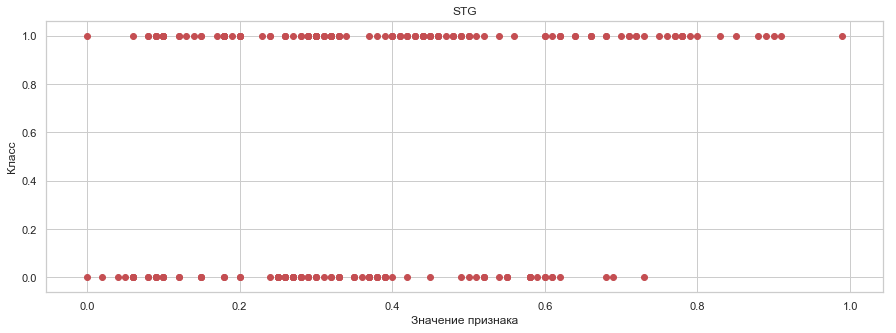

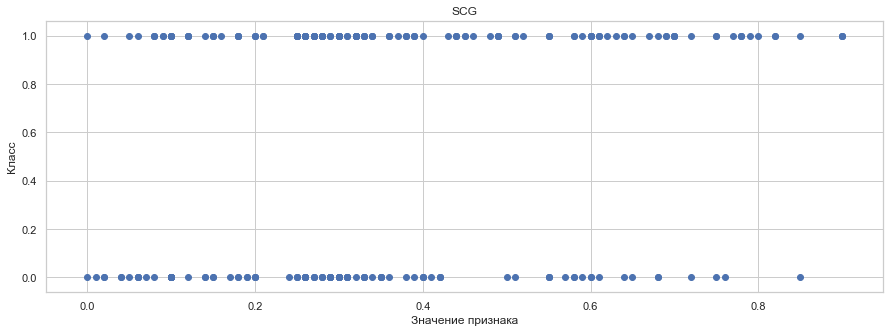

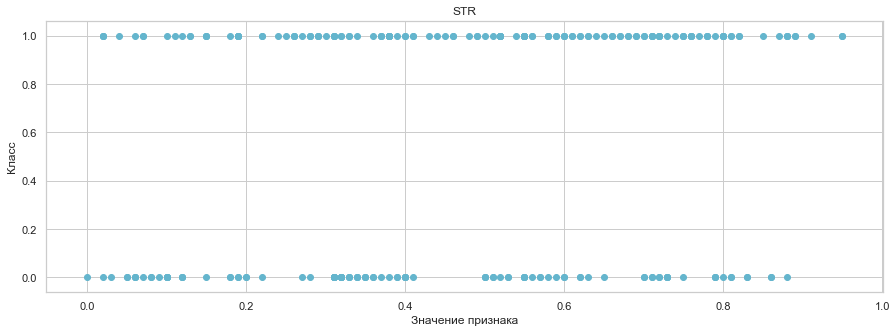

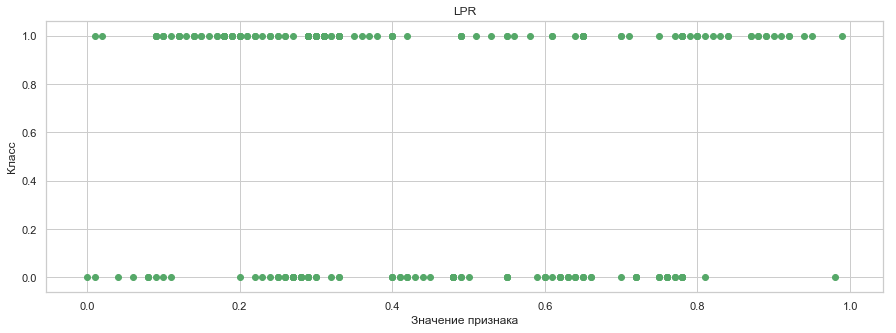

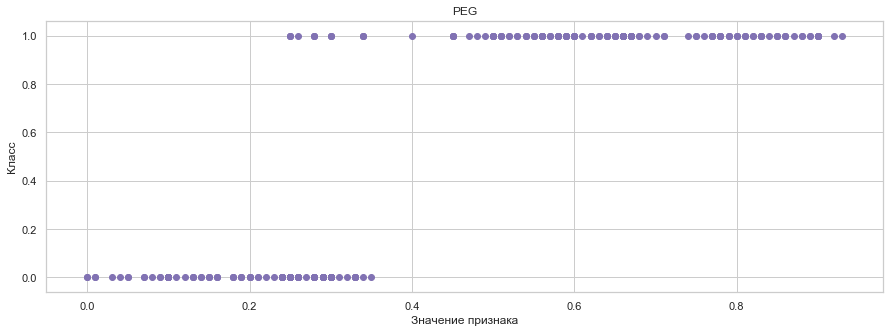

In [13]:
key = 0
colors = ["r", "b", "c", "g", "m", 'y']
for i in data.columns:
    plt.figure(figsize=(15, 5))
    plt.title(i)
    plt.scatter(data[i].values, target_vector, c = colors[key])
    key += 1
    plt.xlabel('Значение признака')
    plt.ylabel('Класс')
    plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Деление выборки на два поддерева лучше производить по признаку PEG, так как в нем мало признаков которые имеют одинаковые значения и относящиеся к одному классу. 
Да, данный результат согласуется с scatter графиками, как видно на рисунке, большинство объектов имеют разные значения и относятся к разным классам. Исходя из графика кривых, можно сказать, что вид кривой для хороших признаков можно охарактеризовать как нормальное распределение, в отличие от других признаков, где распределение похоже на равномерное.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [14]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df = pd.read_table('agaricus-lepiota.data', sep=',')
df[df.columns] = enc.fit_transform(df[df.columns])
y = df['p']
df.drop(columns=['p'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.5, random_state=42)
X_train.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
5873,5,3,5,1,5,1,0,0,10,0,...,2,2,7,0,2,2,0,7,1,6
2369,5,0,4,1,5,1,0,0,10,1,...,2,6,7,0,2,1,4,2,5,0
871,5,3,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,3,3
7019,3,0,8,0,5,1,1,0,2,0,...,1,7,7,0,2,2,4,7,2,1
2217,5,3,4,1,5,1,0,0,5,1,...,2,6,7,0,2,1,4,2,4,0


In [15]:
from hw5code import DecisionTree

y_train = np.array(y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
types = np.array(['categorical']*df.shape[1])
tree = DecisionTree(types)
# print(X_train)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f'accuracy = {accuracy_score(y_test, y_pred)}')

accuracy = 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [16]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data
    # ((((

"wget" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [17]:
df_mushroom = pd.read_table('agaricus-lepiota.data', sep=',')
df_tic_tac_toe = pd.read_table('tic-tac-toe.data', sep=',')
df_car = pd.read_table('car.data', sep=',')
df_nursery = pd.read_table('nursery.data', sep=',')

In [18]:
df_mushroom[df_mushroom.columns] = enc.fit_transform(df_mushroom[df_mushroom.columns])
y_mushroom = df_mushroom['p']
df_mushroom.drop(columns=['p'], inplace=True)
df_mushroom.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
1,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
2,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
3,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
4,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1


In [19]:
df_tic_tac_toe[df_tic_tac_toe.columns] = enc.fit_transform(df_tic_tac_toe[df_tic_tac_toe.columns])
y_tic_tac_toe = df_tic_tac_toe['positive']
df_tic_tac_toe.drop(columns=['positive'], inplace=True)
df_tic_tac_toe.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3
0,2,2,2,2,1,1,1,2,1
1,2,2,2,2,1,1,1,1,2
2,2,2,2,2,1,1,1,0,0
3,2,2,2,2,1,1,0,1,0
4,2,2,2,2,1,1,0,0,1


In [20]:
df_car = df_car.replace('unacc', '0')
df_car = df_car.replace('acc', '0')
df_car = df_car.replace('vgood', '1')
df_car = df_car.replace('good', '1')

df_car[df_car.columns] = enc.fit_transform(df_car[df_car.columns])
y_car = df_car['unacc']
df_car.drop(columns=['unacc'], inplace=True)
df_car.head()

,vhigh,vhigh.1,2,2.1,small,low
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [21]:
df_nursery = df_nursery.replace('not_recom', '0')
df_nursery = df_nursery.replace('recommend', '0')
df_nursery = df_nursery.replace('very_recom', '1')
df_nursery = df_nursery.replace('priority', '1')
df_nursery = df_nursery.replace('spec_prior', '1')

df_nursery[df_nursery.columns] = enc.fit_transform(df_nursery[df_nursery.columns])
y_nursery = df_nursery['recommend']
df_nursery.drop(columns=['recommend'], inplace=True)
df_nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended
0,2,3,0,0,0,0,0,1
1,2,3,0,0,0,0,0,0
2,2,3,0,0,0,0,2,2
3,2,3,0,0,0,0,2,1
4,2,3,0,0,0,0,2,0


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

X = np.array(df_mushroom)
y = np.array(y_mushroom)
X_1 = np.array(df_car)
y_1 = np.array(y_car)
types = np.array(['real']*df.shape[1])
tree = DecisionTree(types)
# print(X_train)
print(f'accuracy = {cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score))}')


accuracy = [1.         1.         1.         1.         1.         1.
 0.99261084 1.         1.         1.        ]
